In [21]:
# Here I am importing the main libraries to our data analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Starting importing the database from the csv file
df = pd.read_csv("student_habits_performance.csv")

In [ ]:
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


In [ ]:
df.info() # only to see what columns have int or float as datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

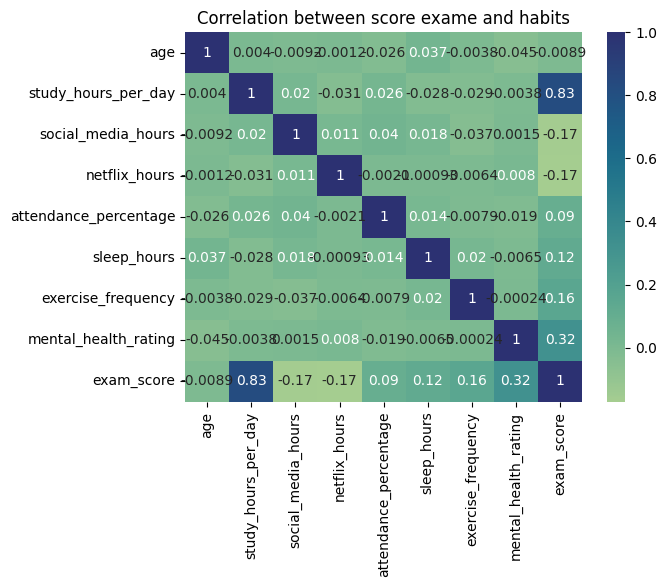

In [ ]:
# Extracting a heatmap to discover some correlation among variables
columns_to_analyze = ["age",
           "study_hours_per_day",
           "social_media_hours",
           "netflix_hours",
           "attendance_percentage",
           "sleep_hours",
           "exercise_frequency",
           "mental_health_rating",
           "exam_score"]
# only columns which have int or float as datatype

sns.heatmap(df[columns_to_analyze].corr(), cmap="crest", annot=True)
plt.title("Correlation between exam score and habits")
plt.show()

#### so far I was able to identify positive and negative correlation between the variables, such as:
1 - Daily study hours interfere positively on exam score  
2 - However the variable age doesn't interfere too much on exam score  
3 - High social media using interfere negativetly on exam score  

In [ ]:
# comparing who study more than 6 hour per day and who study mines than 3 hours per day.
study_more_than_6_hours = df["study_hours_per_day"] > 6
study_mines_than_3_hours_per_day = df["study_hours_per_day"] < 3

average_6_hours_score = df[study_more_than_6_hours]["exam_score"].mean()
average_3_hours_score= df[study_mines_than_3_hours_per_day]["exam_score"].mean()

print(f"Average score of students who study more than 6 hours per day: {average_6_hours_score:.4}")
print(f"Average score of students who study mines than 3 hours per day: {average_3_hours_score:.4}")

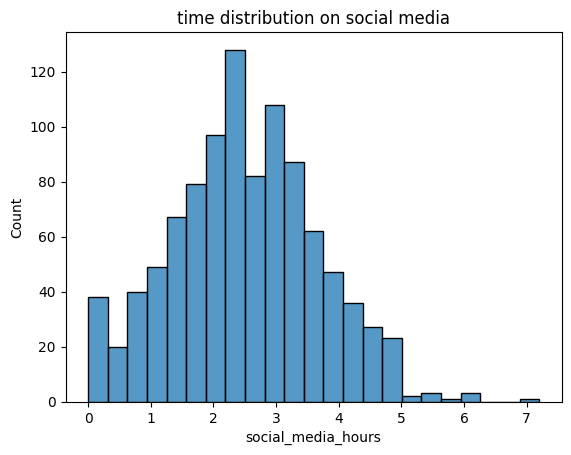

In [39]:
# analyzing social media use with histogram
sns.histplot(data=df, x="social_media_hours")
plt.title("time distribution on social media")
plt.show()

In [52]:
# comparing averages
students_study_more_than_6h = df["study_hours_per_day"] > 6
students_study_mines_than_3h = df["study_hours_per_day"] > 3

average_more_than_6h = df[students_study_more_than_6h]["exam_score"].mean()
average_mines_than_3h = df[students_study_mines_than_3h]["exam_score"].mean()

print(f'Average score of students who sudy more than 6h per day: {average_more_than_6h:.2f}')
print(f'Average score of students who sudy mines than 3h per day: {average_mines_than_3h:.2f}')

Average score of students who sudy more than 6h per day: 97.77
Average score of students who sudy mines than 3h per day: 77.98


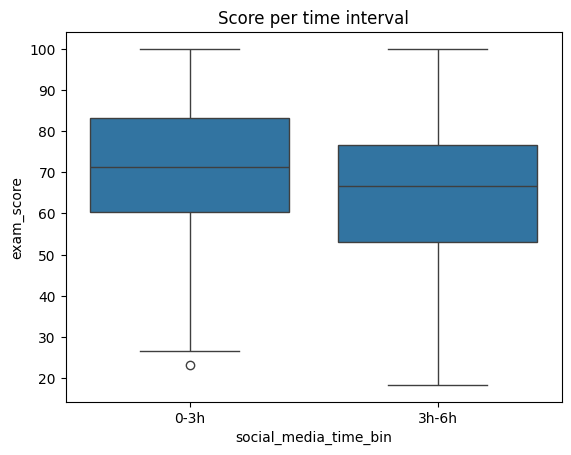

In [51]:
# analyzing social media use effects on exam score per time interval
df["social_media_time_bin"] = pd.cut(
    df["social_media_hours"],
    bins=[0, 3, 6],
    labels=["0-3h", "3h-6h"]
) # defining and organizing analysis per time interval

sns.boxplot(x="social_media_time_bin", y="exam_score", data=df)
plt.title("Score exam per time interval")
plt.show()

#### Above us we are able to analyze the upper bound and lower bound of the score exam in each time interval, also we can notice that the time interval between 0 and 3 there's a outline that its score exam is around 30 and 20.

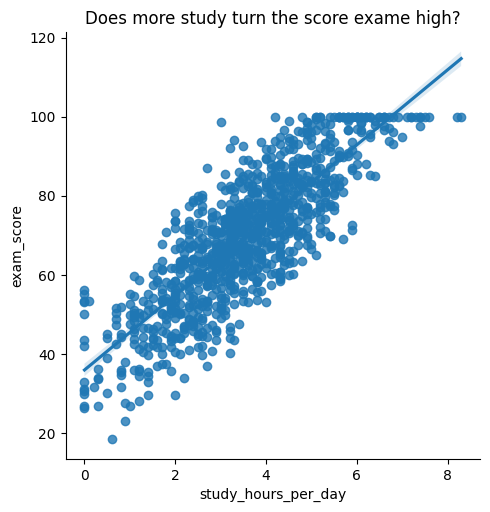

In [ ]:
# making a scatter plot with regressive line between study_hours_per_day and exam_score
sns.lmplot(data=df, y="exam_score", x="study_hours_per_day")
plt.title("Does more study turn the score exame high?")
plt.show()


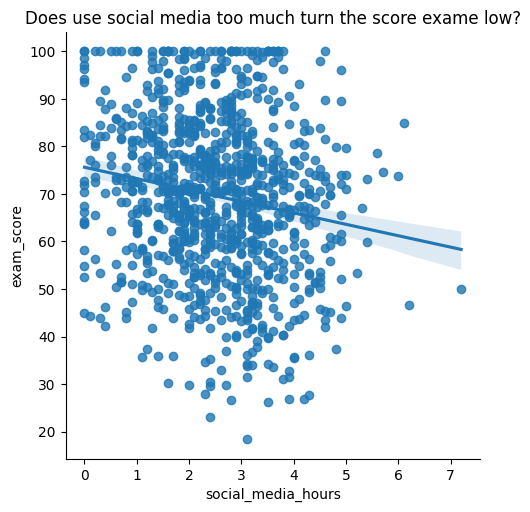

In [27]:
# making a scatter plot with regressive line between social_media_hours and exam_score
sns.lmplot(data=df, y="exam_score", x="social_media_hours")
plt.title("Does use social media too much turn the score exame low?")
plt.show()

#### by the regressive lines we're able to conclude that high social media index interfere negativetly on exam score and high study hours per day interfere positivetly on exam score  